# Sanbercode Basic Python for Data Science
# Final Project Guide
---
---
---

## 1. Business/Project Understanding

- Explain project's background and requirement.

Overview 

Seiring perkembangan zaman tidak membuktikan bahwa kehidupan masyarakat secara keseluruhan terus meningkat. Banyaknya masalah yang dihadapi secara global membuat banyak negara melakukan berbagai kerjasama untuk saling membantu menemukan solusi yang terbaik. Didukung dengan kemajuan teknologi saat ini tentunya sangat membantu berbagai masalah yang dihadapi bersama. Akses informasi yang mudah dan cepat memberikan kemudahan dalam menghimpun ataupun mengolah data bagi individu ataupun lembaga di masyarakat, tidak terkecuali lembaga kemanusiaan untuk menghimpun data terkait sosial, kesehatan, dan ekonomi dari berbagai negara di seluruh dunia.
Help internasional merupakan program sukarelawan untuk memberdayakan masyarakat dan mengentaskan kemisikinan melalui pembangunan yang berkelanjutan. Saat ini HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Dan telah mengumpulkan data dari berbagai negara yang nantinya akan digunakan sebagai dasar untuk pemberian bantuan kemanusiaan. Negara-negara yang masih terbelakang dari segi sosial, kesehatan dan ekonomi dapat digolongkan secara objektif dan bantuan seperti apa yang dibutuhkan oleh negara tersebut.

Requirement
Hasil yang akan dipaparkan adalah berupa grafik dan juga hasil analisa statistik dari data beberapa negara yang dikategorikan terbelakang dari segi sosial, kesehatan dan juga ekonomi. Dari kategori negara yang ada juga akan dijelaskan mengenai keterangan negara tersebut termasuk terbelakang sehingga yang sangat membutuhkan bantuan dibandingkan dengan negara lain. 

objective 
Mengkategorikan negara berdasarkan faktor sosial, ekonomi, dan kesehatan yang menentukan pembangunan negara secara keseluruhan sehingga didapati beberapa negara yang membutuhkan bantuan kemanusiaan.

---
---

## 2. The Data

### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
    -  How many rows it has?

### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.


### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
2. Elaborate the reason you chose them.
    
### 2.4 Data Cleaning
1. Missing values
    - Check if exist.
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
<br><br>
2. Ouliers
    - Check if exist (Even better if graphical representation is used).
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
    
### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.
2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

In [152]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy import stats

df1 = pd.read_csv('Data_Negara_HELP.csv')
# 2.1 Dataset Understanding
print("Dataset dari Data_Negara_Help memiliki " , len(df1.columns) , " fitur sebagai berikut ")

for i in df1.columns :
    print(i)
print(10 * "===")
print("Data ini berisikan" , len(df1.index), "baris atau negara")




Dataset dari Data_Negara_Help memiliki  10  fitur sebagai berikut 
Negara
Kematian_anak
Ekspor
Kesehatan
Impor
Pendapatan
Inflasi
Harapan_hidup
Jumlah_fertiliti
GDPperkapita
Data ini berisikan 167 baris atau negara


2.1 Dataset Understanding

Data yang akan digunakan berasal dari organisasi HELP internasional yang berisikan data dari 167 negara dengan 10 feature sebagai berikut 
Negara : Nama Negara
Kematian_anak : Kematian anak di bawah usia 5 tahun per 1000 kelahiran
Ekspor : Ekspor barang dan jasa perkapita
Kesehatan : Total pengeluaran kesehatan perkapita
Impor : Impor barang dan jasa perkapita
Pendapatan : Penghasilan bersih perorang
Inflasi : Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
Harapan_hidup : Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
Jumlah_fertiliti : Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
GDPperkapita : GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi

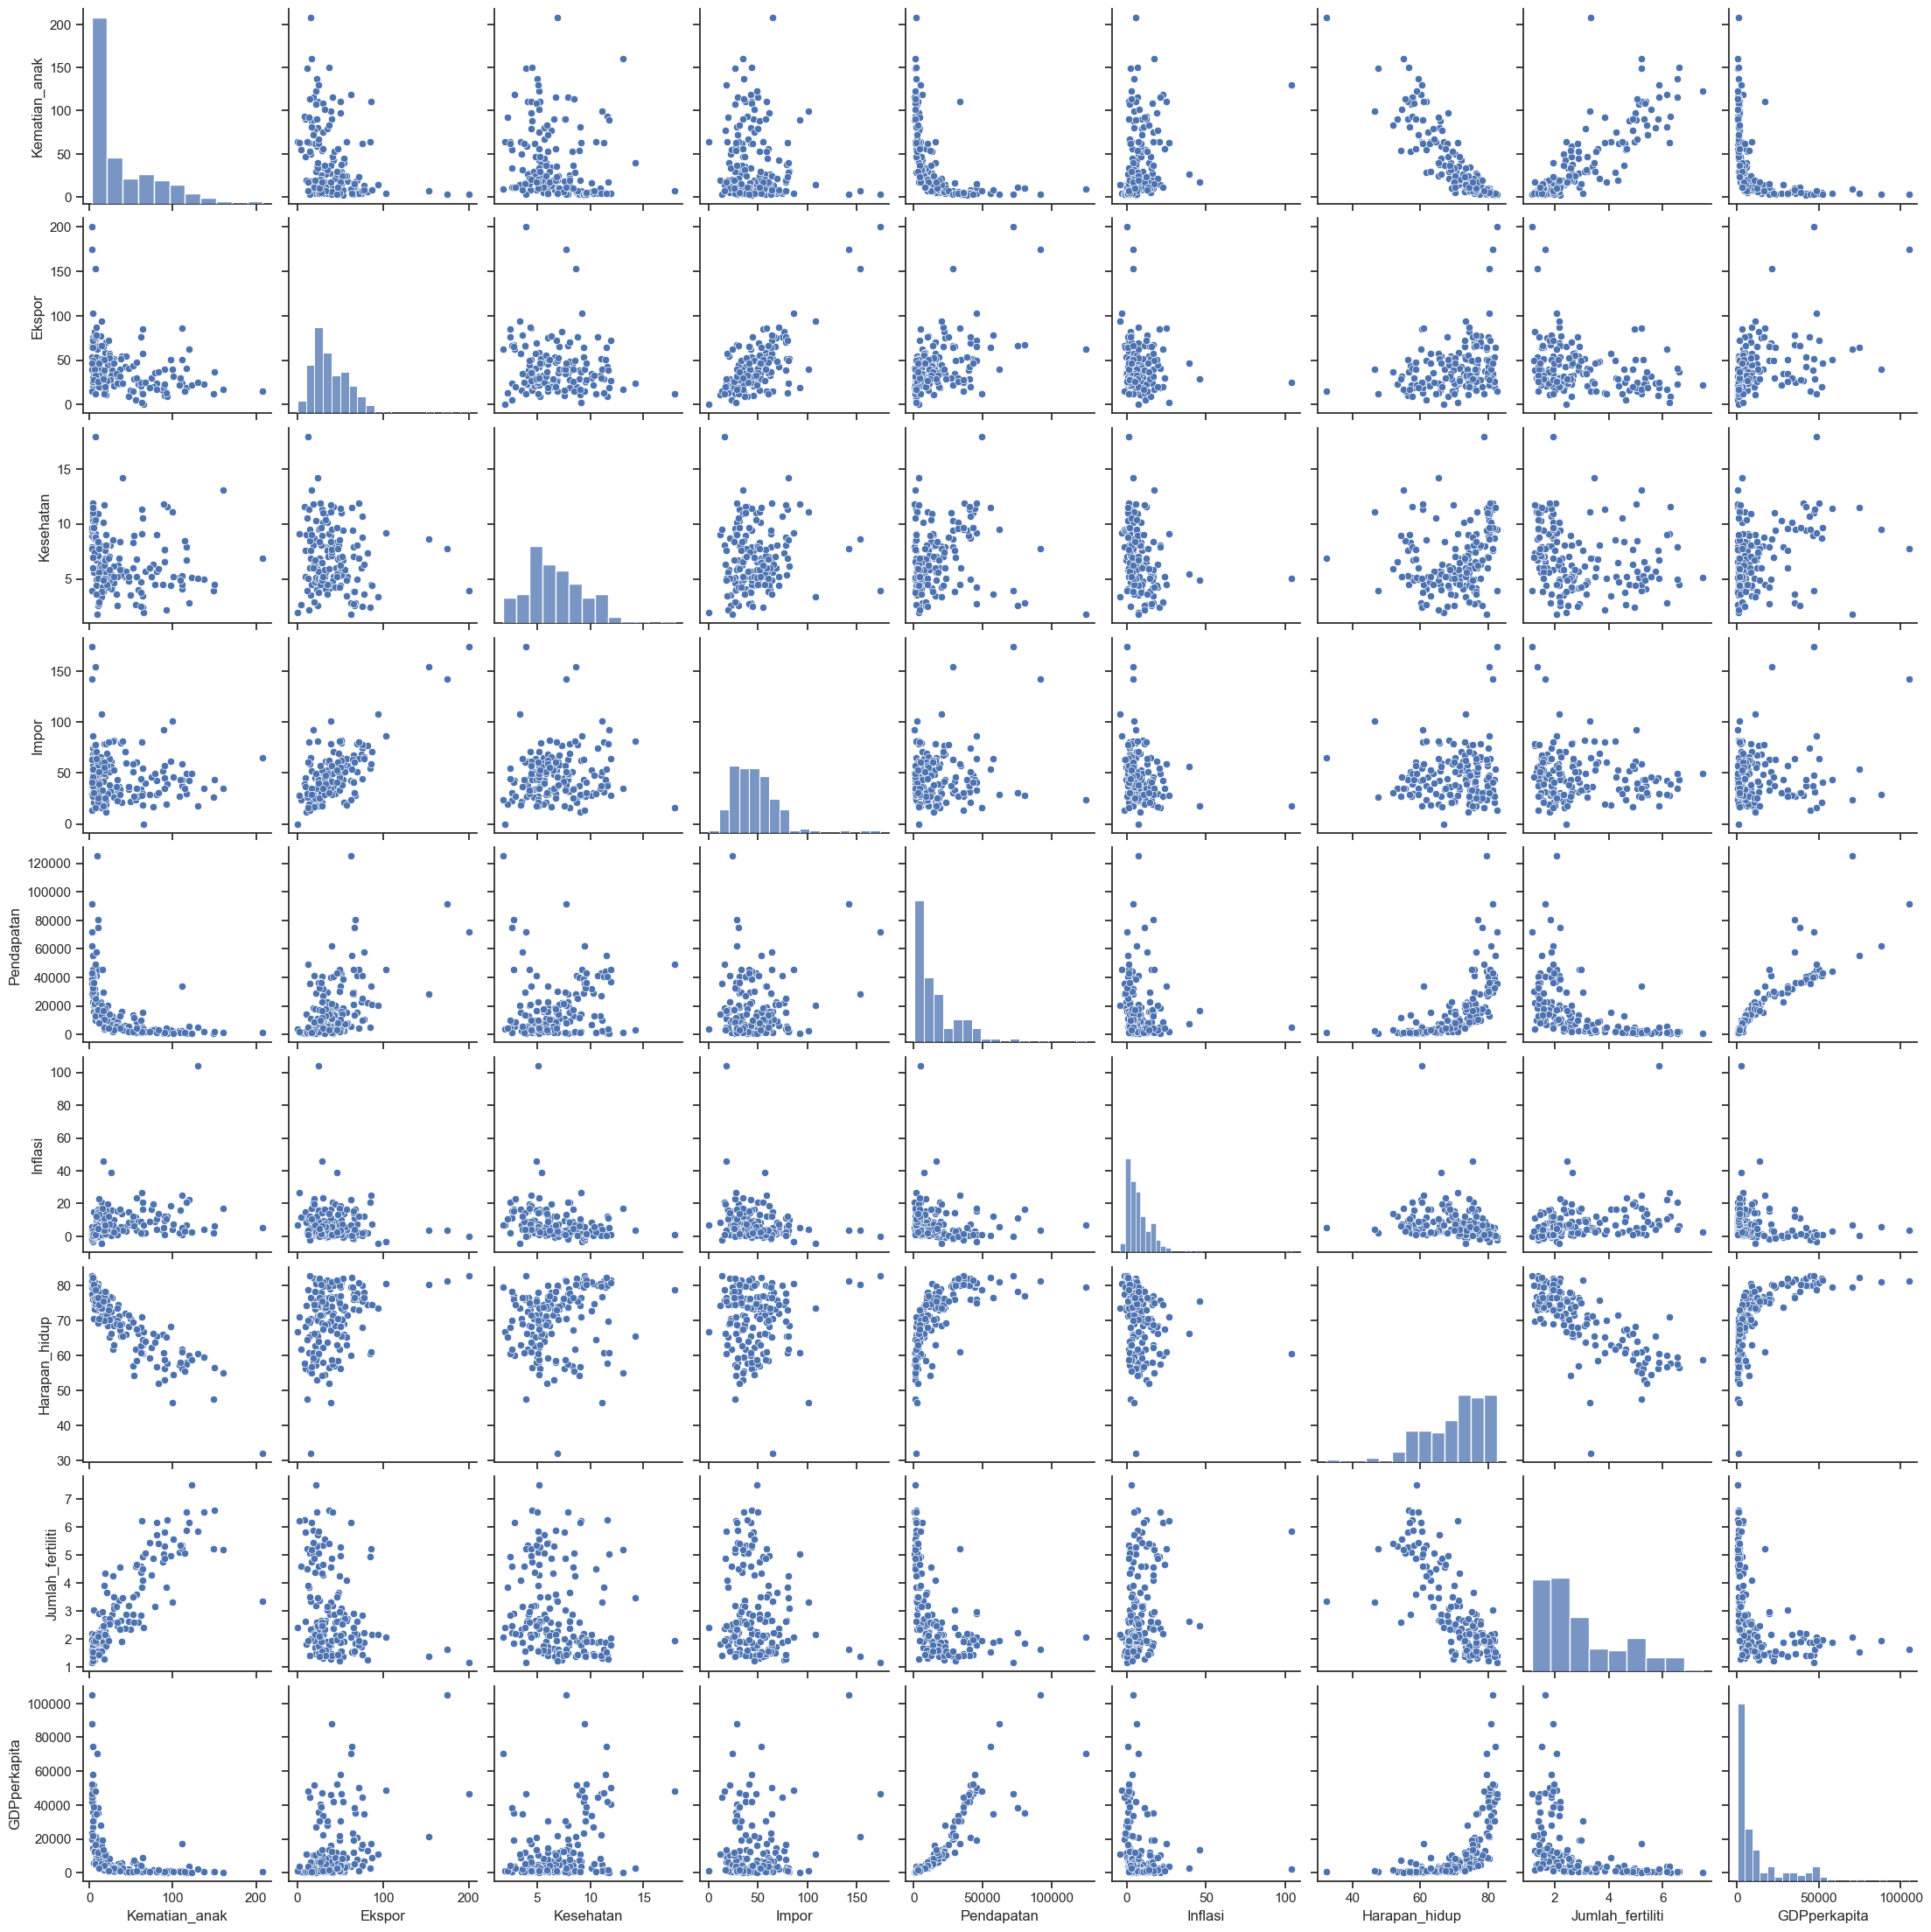

In [153]:
#2.2 EDA part 1 

# multivariate analysis
sns.set(style="ticks")
sns.pairplot(df1)
plt.show()


2.1 EDA Part 1 

Mulitvariate analysis 
Dengan menggunakan pair plot didapatkan hubungan antara semua features dari dataset. 
Pair plot terdiri dari histogram yang menjelaskan mengenai value dari features, serta scatter plot yang menjelaskan hubungan dari 2 feature, hubungan tiap feature dapat diketahui dari bentuk distribusi point plot, bentuk linier menandakan korelasi positif yaitu apabila nilai salah satu features naik feature yang lain akan naik contohnya adalah GDPperkapita dan Pendapatan, sebaliknya apabila salah satu feature turun feature yang lain naik dinamakan dengan korelasi negatif contohnya adalah kematian anak dan harapan hidup, sedangkan distribusi plot yang merata artinya tidak terdapat hubungan langsung diantara kedua feature tersebut. 
Selain itu kuatnya hubungan tersebut dapat diketahui dari sebaran distribusinya, apabila sebaran titik berkumpul pada suatu garis maka hubungan feature tersebut semakin kuat, apabila menyebar hubungannya tergolong lemah, sebagai contoh hubungan kematian anak dan harapan hidup sebaran nya mengumpul pada satu garis lurus, walaupun korelasi nya negatif hubungan kedua feature tersebut tergolong kuat

In [155]:
# 2.3 Feature Selection

print("Feature yang dipilih adalah GDPperkapita dan Kesehatan")
df = df1.drop(df1.columns[[0, 1, 2,4, 5,6,7,8]], axis=1) 

df = df.astype({'GDPperkapita':'float'})

print(df.describe())


Feature yang dipilih adalah GDPperkapita dan Kesehatan
        Kesehatan   GDPperkapita
count  167.000000     167.000000
mean     6.815689   12964.155689
std      2.746837   18328.704809
min      1.810000     231.000000
25%      4.920000    1330.000000
50%      6.320000    4660.000000
75%      8.600000   14050.000000
max     17.900000  105000.000000


Elaborate why chose those feature
Menurut Azwar Rahmat (2021) suatu negara dapat dikatakan negara maju dan berkembang berdasarkan kualitas kesejahteraan dari penduduk di negara tersebut, dimana kualitasnya tercermin dari tiga hal pokok yaitu Tingkat Kesehatan , Pendidikan, dan Tingkat pendapatan.
Dari pernyataan diatas dapat disimpulkan bahwa kesejahteraan penduduk dapat dinilai dari 3 hal pokok. Data yang disediakan oleh HELP mencakup 10 feature dimana terdapat indikator nilai untuk Tingkat Kesehatan dan juga Tingkat Pendapatan yang dijelaskan sebagai GDP perkapita, akan tetapi tidak ada indikator tentang Tingkat Pendidikan sehingga kedua feature diatas akan dipilih sebagai bahan untuk analisis lanjutan.
Data Kesehatan dan GDP perkapita mampu mewakili kesejahteraan penduduk sehingga relevan digunakan sebagai dasar penilaian untuk memberikan bantuan dana untuk kemanusiaan yang akan dilakukan oleh  HELP internasional.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kesehatan     167 non-null    float64
 1   GDPperkapita  167 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB
Di kedua kolom yang akan digunakan tidak ada missing values semuanya lengkap dan memiliki tipe float
Outlier data sebelum handling
GDP perkapita features [ 51900.  46900.  44400.  35300.  47400.  58000.  46200.  40600.  41800.
  41900.  48700.  35800.  44500.  38500. 105000.  50300.  33700.  87800.
  70300.  46600.  52100.  74600.  35000.  38900.  48400.]
Kesehatan features [14.2 17.9]


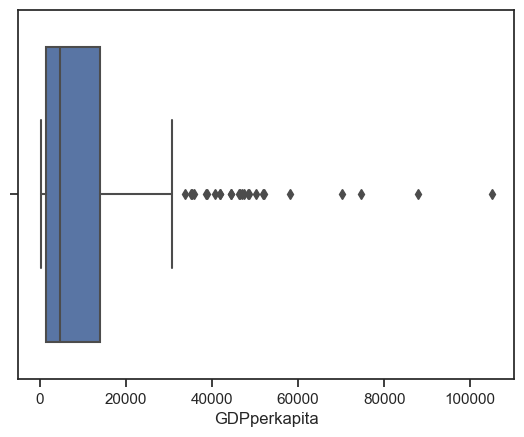

In [176]:
# 2.4 Data Cleaning
# Missing value

df.info()

print("Di kedua kolom yang akan digunakan tidak ada missing values semuanya lengkap dan memiliki tipe float")
print(10*"====")

# Find Outlier
print("Outlier data sebelum handling")

sns.boxplot(x ="GDPperkapita",data=df)

def get_func(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

def get_outliers(x):
    lower_bound, upper_bound = get_func(x)
    return x[np.where((x < lower_bound ) | (x > upper_bound))]


print( "GDP perkapita features", get_outliers(df["GDPperkapita"].values))
print( "Kesehatan features",get_outliers(df["Kesehatan"].values))


Elaborate you handle them
Setelah data di drop dan memilih hanya feature Kesehatan dan GDP perkapita  selanjutnya data dicheck apabila ada data yang kosong, ataupun memiliki nilai Nan ataupun berbeda dengan yang lain. 
Dari hasil diatas dapat diketahui bahwa tidak adanya missing value, artinya data yang digunakan sudah lengkap. Kedua data juga memiliki tipe data yang sama yaitu float64, setelah melakukan casting data untuk feature GDP perkapita. 

Sehingga tidak diperlukan handling data yang masih kosong

<AxesSubplot: xlabel='Kesehatan'>

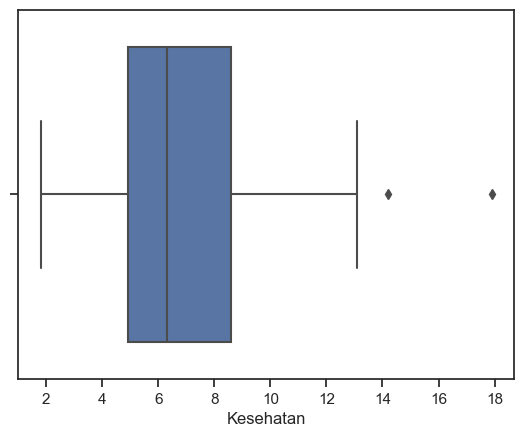

In [165]:
print("Outlier dari features Kesehatan")

sns.boxplot(x="Kesehatan", data=df)

        Kesehatan  GDPperkapita
count  167.000000     167.00000
mean     6.767904   10007.00000
std      2.534195   10929.82389
min      2.770000     459.00000
25%      4.920000    1330.00000
50%      6.320000    4660.00000
75%      8.600000   14050.00000
max     11.600000   30800.00000
Setelah melakukan winsorize nilai min dan max data berubah sesuai dengan deskripsi dan outlier dari data pun dapat disesuaikan


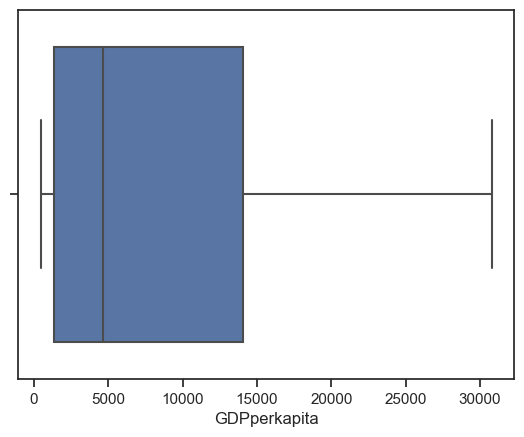

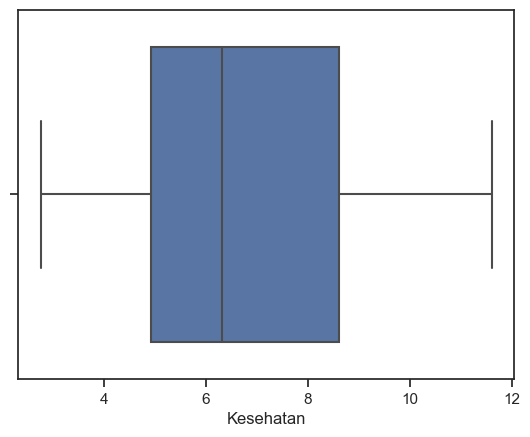

In [175]:

# handling Outlier with Winsorizing 
# Mengambil 80% window data untuk Gdp perkapita
# Mengambil 90% window data untuk Kesehatan 
# akan dilakukan capping pada outlier sehingga high outlier akan menjadi sama dengan upperlimit, dan low outlier akan menjadi nilai lower limit

df_use = df.copy()
features = ["GDPperkapita"]
def capping (df, f) :
    for d in f :
        stats.mstats.winsorize(a=df[d], limits =[0.05, 0.15], inplace=True)


features2 = ["Kesehatan"]
def capping2 (df, f) :
    for d in f :
        stats.mstats.winsorize(a=df[d], limits =[0.05, 0.05], inplace=True)

capping(df_use, features)
capping2(df_use, features2)

print(df_use.describe())
print(10*"====")
#print(len(df_use.index))
print("Setelah melakukan winsorize nilai min dan max data berubah sesuai dengan deskripsi dan outlier dari data pun dapat disesuaikan dengan data outlier tidak dihapus")

sns.boxplot(x="GDPperkapita", data=df_use)
plt.show()

sns.boxplot(x="Kesehatan", data=df_use)
plt.show()


elaborate how exactly you handle them
Program diatas dimaksudkan untuk mengambil 80% window data GDP perkapita dengan limits 5% bawah dan 15% data atas, sedangkan untuk kesehatan diambil 90% window dengan limits 5% untuk data atas dan bawah, sehingga data outlier akan di assign ke upper limit maupun lower limit. Setelah dilakukan outlier handling didapat perubahan nilai min dan max data sebeumnya sehingga outlier bisa disesuaikan


elaborate why you handle them with such way
Winsorizing method merupakan salah satu metode untuk melakukan transformasi statistik dengan capping outlier pada upper limit maupun lower limit sehingga outlier ekstrim akan lebih dekat dengan dataset. 

Metode winsorizing ini digunakan karena outlier yang ada cukup banyak sehingga tidak bisa untuk langsung dilakukan removing, karena akan menghilangkan banyak data yang data tersebut yang masih dalam kewajaran dan bukan error. Oleh karena itu menggunakan metode winsorizing dapat menyesuaikan outlier ke upper limit maupun lower limit sehingga tidak menghapus data outlier. 


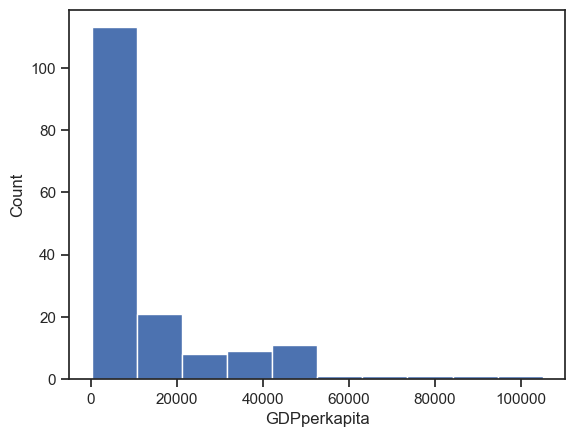

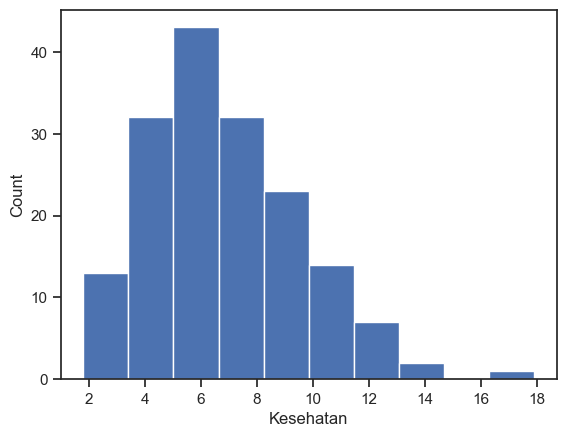

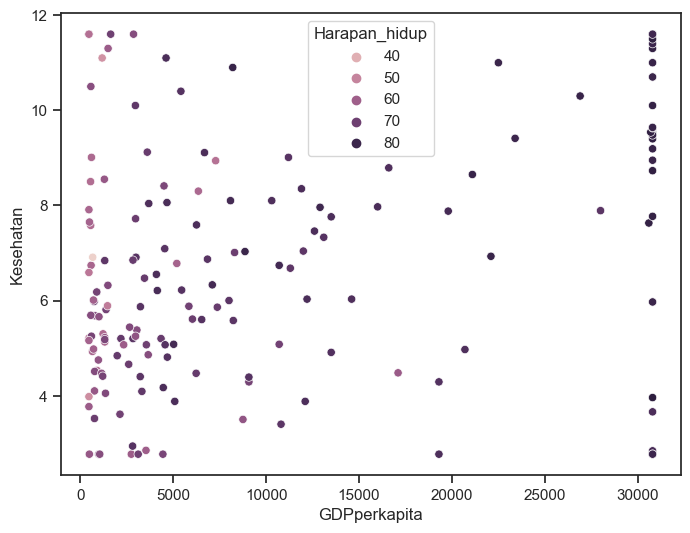

In [178]:
# 2.5 EDA Part 2

# univariate analysis
plt.hist(df["GDPperkapita"])
plt.xlabel("GDPperkapita")
plt.ylabel("Count")
plt.show()

plt.hist(df["Kesehatan"])
plt.xlabel("Kesehatan")
plt.ylabel("Count")
plt.show()

# bivariate analysis
df_use["Harapan_hidup"]= df1["Harapan_hidup"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_use,x="GDPperkapita",y='Kesehatan', hue="Harapan_hidup")
plt.show()


Elaborate what you extract for this information univariate analysis
GDP perkapita
Univariate analysis menjelaskan antara range value dari feature pada koordinat x  dan jumlah negara (data) pada koordinat y, dari data GDP perkapita dapat disimpulkan bahwa sebagian besar negara memiliki  GDP perkapita dibawah $20.000 dimana jumlah negara tersebut mencapai lebih dari 100 negara diantara 167 negara dan tidak lebih dari 20 negara memiliki gdp perkapita diatas  $40.000 
Kesehatan
Dari data tingkat kesehatan distribusi dari seluruh negara cenderung merata dan sebagian besar negara memiliki tingkat kesehatan rata2 disekitar koefisien 6 dengan jumlah lebih dari 40 negara, jumlah negara dengan tingkat kesehatan lebih dari 14 hanya sedikit yaitu kurang dari 10 negara ini menunjukkan bahwa sebagian besar negara secara tingkat kesehatan memiliki tingkat yang tidak terlalu buruk.

Elaborate what information you extract for thats information bivariate analysis
Scatter plot diatas menunjukkan korelasi dari 2 variabel yaitu GDP perkapita dan tingkat kesehatan, selain itu ditambahkan juga tingkat harapan hidup sebagai pembanding lain. 

Secara visual dapat dilihat bahwa distribusi point setelah diplot cenderung merata dan tidak membentuk sebuah bentuk yang linier selain itu pointplot ini juga menyebar dengan bebas. Oleh karena itu dapat disimpulkan bahwa tidak ada korelasi langsung antara variabel Kesehatan dan juga GDP perkapita, dan tidak dapat dinanalisis terhadap variabel dependen ataupun independenya.

Namun dengan pembanding Tingkat Harapan Hidup, GDP perkapita memilki korelasi atau hubungan, ini dapat diketahui dengan semakin tinggi tingkat GDP perkapita warna point plot semakin gelap, berbeda dengan tingkat Kesehatan distribusi warna point plot cenderung tidak menentu baik tingkat kesehatan tinggi maupun rendah, karena itu Harapan Hidup tiak memiliki hubungan signifikan dengan Tingkat Kesehatan  

---
---

## 3. Clustering
1. Scale the Data
<br><br>
2. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)
<br><br>
3. Do clustering with the decided amount of cluster.
<br><br>
4. Create the clustering result graph.

c:\Users\X1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\X1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\X1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\X1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

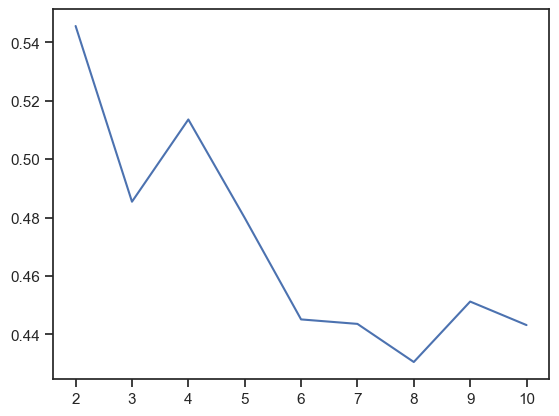

Berdasarkan plot didapatkan bahwa K cluster optimal pada angka 4


c:\Users\X1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Berikut merupakan grafik plot dengan data dibagi menjadi 4 klaster


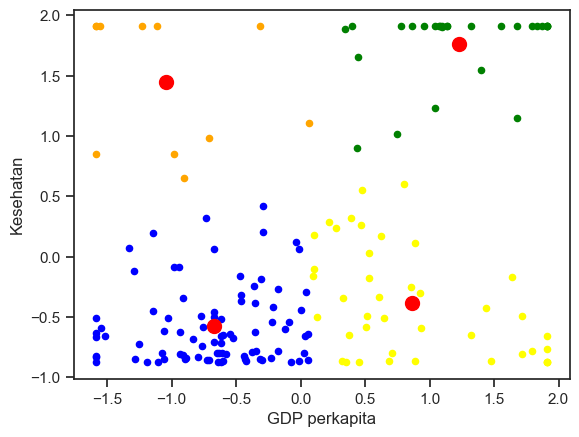

In [180]:
#scaling data
df_toCluster = df_use.drop("Harapan_hidup", axis = 1)
sc = StandardScaler()
df_new = sc.fit_transform(df_toCluster.astype(float))

# decide the number of cluster using silhouette score method
"""wcss=[]
for i in range (1,11) :
    kmeans = KMeans(n_clusters = i, init ="k-means++", random_state = 42)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel(" Jumlah Cluster")
plt.ylabel("wcss")
plt.show()
"""

data = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(df_new)
    labels = kmeans.labels_
    data.append(silhouette_score(df_new, labels, metric = 'euclidean'))
    k_list.append(k)

plt.plot(k_list,data)
plt.show()

print("Berdasarkan plot didapatkan bahwa K cluster optimal pada angka 4")

#Clustering with 4 cluster
kmeans1 = KMeans(n_clusters = 4,init="k-means++", random_state=42).fit(df_new)
labels1 = kmeans1.labels_

new_dfout = pd.DataFrame(data = df_new, columns= ["GDPperkapita","Kesehatan"])
new_dfout["labels_kmeans1"] = labels1

plt.scatter(new_dfout.GDPperkapita[new_dfout.labels_kmeans1 == 0], new_dfout["Kesehatan"][new_dfout.labels_kmeans1 == 0], c = "yellow", s=20 )
plt.scatter(new_dfout.GDPperkapita[new_dfout.labels_kmeans1 == 1], new_dfout["Kesehatan"][new_dfout.labels_kmeans1 == 1], c = "blue", s=20 )
plt.scatter(new_dfout.GDPperkapita[new_dfout.labels_kmeans1 == 2], new_dfout["Kesehatan"][new_dfout.labels_kmeans1 == 2], c = "green", s=20 )
plt.scatter(new_dfout.GDPperkapita[new_dfout.labels_kmeans1 == 3], new_dfout["Kesehatan"][new_dfout.labels_kmeans1 == 3], c = "orange", s=20 )

#create the resulth graph
print("Berikut merupakan grafik plot dengan data dibagi menjadi 4 klaster")
centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], s= 100, c="red");
plt.xlabel("GDP perkapita")
plt.ylabel("Kesehatan")
plt.show()


Disini silhoutte method dipilih karena lebih mudah menentukan titik paling tinggi dari data yang merupakan optimal n-cluster, dibandingkan dengan menemukan titik elbow method ataupun langsung menentukan jumlah n-cluster. Dari grafik diatas didapatkan n-score di titik paling tinggi grafik yaitu pada angka 4, artinya n-cluster optimal yang digunakan adalah 4 .  Berdasarkan data GDP perkapita dan tingkat kesehatan, negara akan dibagi menjadi 4 klaster. 

Dari grafik diatas distribusi data dibagi menjadi 4 klatster atau berdasarkan tingkat kesehatan dan GDP perkapita negara dibagi menjadi 4 klaster yaitu sebagai berikut :
GDP perkapita Tinggi dan Kesehatan Tinggi
GDP perkapita Tinggi dan Kesehatan Rendah
GDP perkapita Tinggi dan Kesehatan Rendah
GDP perkapita Rendah dan Kesehatan Rendah

Klaster 4 akan menjadi fokus analisa selanjutnya karena termasuk negara yang terbelakang dan sesuai objektif sebelumnya untuk menentukan negara yang membutuhkan bantuan.


---

---

## 4. Recommendation

1. Choose which country cluster to focus.
<br><br>
2. Show which countries included in that cluster.
<br><br>
3. Among those countries, choose the best coutries to receive help
    - Remember, USD 10 Mil. is a small amount for this kind of cause, choose the countries wisely.
    - Elaborate the reason you chose them.

In [13]:
# cluster to focus is cluster with GDPperkapita and Kesehatan under mean the data, which is exclude on underdeveloped coutries (Negara terbelakang) 
# berikut merupakan isi dari masing2 kluster
#print(df_toCluster.describe())
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy import stats

df = df1.drop(df1.columns[[0, 1, 2,4, 5,6,7,8]], axis=1) 

df = df.astype({'GDPperkapita':'float'})

df_use = df.copy()
df_use["Harapan_hidup"]= df1["Harapan_hidup"]
features = ["GDPperkapita"]
df1 = pd.read_csv('Data_Negara_HELP.csv')
df_toCluster = df_use.drop("Harapan_hidup", axis = 1)
sc = StandardScaler()
df_new = sc.fit_transform(df_toCluster.astype(float))
df_toCluster["Negara"] = df1["Negara"]



rata2_kesehatan= df_toCluster.Kesehatan.mean()
rata2_GDPperkapita = df_toCluster.GDPperkapita.mean()

kriteria1 = df_toCluster.GDPperkapita >= rata2_GDPperkapita
kriteria2 = df_toCluster.Kesehatan >= rata2_kesehatan

print("Negara Maju ")
print(df_toCluster[(kriteria1&kriteria2)])
print(10 * "===")


Negara Maju 
     Kesehatan  GDPperkapita           Negara
7         8.73       51900.0        Australia
8        11.00       46900.0          Austria
10        7.89       28000.0          Bahamas
13        7.97       16000.0         Barbados
15       10.70       44400.0          Belgium
29       11.30       47400.0           Canada
41        7.76       13500.0          Croatia
43        7.88       19800.0   Czech Republic
44       11.40       58000.0          Denmark
53        8.95       46200.0          Finland
54       11.90       40600.0           France
58       11.60       41800.0          Germany
60       10.30       26900.0           Greece
67        7.33       13100.0          Hungary
68        9.40       41900.0          Iceland
73        9.19       48700.0          Ireland
74        7.63       30600.0           Israel
75        9.53       35800.0            Italy
77        9.49       44500.0            Japan
91        7.77      105000.0       Luxembourg
98        8.65       

In [144]:
print("Negara Berkembang")
print(df_toCluster[(kriteria1&~kriteria2)])
print(df_toCluster[(~(kriteria1)&kriteria2)])

Negara Berkembang
     Kesehatan  GDPperkapita                Negara
4         6.03       12200.0   Antigua and Barbuda
11        4.97       20700.0               Bahrain
23        2.84       30800.0                Brunei
42        5.97       30800.0                Cyprus
49        4.48       17100.0     Equatorial Guinea
51        6.03       14600.0               Estonia
82        2.77       30800.0                Kuwait
85        6.68       11300.0                Latvia
89        3.88       12100.0                 Libya
115       2.77       19300.0                  Oman
123       2.77       30800.0                 Qatar
125       5.08       10700.0                Russia
128       4.29       19300.0          Saudi Arabia
131       3.40       10800.0            Seychelles
133       3.96       30800.0             Singapore
153       6.74       10700.0                Turkey
157       3.66       30800.0  United Arab Emirates
163       4.91       13500.0             Venezuela
     Kesehata

In [145]:
# This countries in underdeveloped countries 
print( "Berikut merupakan Negara Terbelakang yaitu klaster yang akan dipilih")
dfNegara_terbelakang = df_toCluster[(~(kriteria1)&~(kriteria2))]
print(dfNegara_terbelakang)

Negara Terbelakang
     Kesehatan  GDPperkapita        Negara
1         6.55        4090.0       Albania
2         4.17        4460.0       Algeria
3         2.85        3530.0        Angola
6         4.40        3220.0       Armenia
9         5.88        5840.0    Azerbaijan
..         ...           ...           ...
154       2.77        4440.0  Turkmenistan
161       5.81        1380.0    Uzbekistan
162       5.25        2970.0       Vanuatu
165       5.18        1310.0         Yemen
166       5.89        1460.0        Zambia

[73 rows x 3 columns]


In [184]:
# choose the best country

print("Negara Terbelakang dengan GDP Minimal")
GDPmin = dfNegara_terbelakang.GDPperkapita == dfNegara_terbelakang.GDPperkapita.min()
df_bckctr_gdpmin = dfNegara_terbelakang[(GDPmin)]
print(df_bckctr_gdpmin)

Kesmin = df_bckctr_gdpmin.Kesehatan == df_bckctr_gdpmin.Kesehatan.min()
dfBest_country = df_bckctr_gdpmin[(Kesmin)]
print (11* "=====")
print()
Country_Need_help = dfBest_country['Negara'].values[0]
print("Negara dengan tingkat kesehatan paling rendah dari data diatas sehingga yang layak diberikan bantuan adalah :",Country_Need_help)


Negara Terbelakang dengan GDP Minimal
     Kesehatan  GDPperkapita                    Negara
31        3.98         459.0  Central African Republic
93        3.77         459.0                Madagascar
94        6.59         459.0                    Malawi
106       5.21         459.0                Mozambique
112       5.16         459.0                     Niger

Negara dengan tingkat kesehatan paling rendah dari data diatas sehingga yang layak diberikan bantuan adalah : Madagascar


Dari klaster 4 kemudian negara diseleksi kembali untuk negara dengan gdp paling minimal yang didapatkan 5 negara yaitu Central African Republic, Madagascar, Malawi, Mozambique, dan Nigeria 
dari 5 negara tersebut kembali diseleksi berdasarkan tingkat kesehatan yang paling rendah yaitu negara madagaskar

Kesimpulan
Negara yang paling layak untuk mendapatkan bantuan secara objektif adalah negara madagaskar ditinjau dari GDP perkapita dna tingkat kesehatan yang rendah


---
---

## 5. Deliverables

1. What:
    - PDF file of the report presentation slide.
    - Notebook (.ipynb) file
<br><br>
2. How:
    - Pack them into compressed archive file (.zip/.rar).
    - Upload them to google drive.
    - Submit the link to sanbercode web.

In [ ]:
#okee